|Name|Student ID|
|-|-|
|Erin Khoo|19225733|
|CS5062 & CE6002|ML Competition 2020|

### Results (300 words)

To-Do:
- Clean dataset
- reduce images 32x32 px
- Scaling pixel values to 0-1
- Scaling numerical features
- one-hot encoding categorical
- processing text (stemming and lemmatization, removing stop words
- Managing missing data
- Dimentionality reduction

For any algorithm you try:

    you must be sure that you are applying it correctly (that is you must be sure you have formatted the input in the format that the algorithm needs, you must be sure you understand what the algorithm returns as output).
    if an algorithm has parameters you need to select (example: the degree in polynomial regression, the parameter C (sklearn notation) in logistic regression), you must show that you understand their meaning and that you are optimizing them via cross-validation.
    You must add a brief high-level description of the algorithm you are trying and an explanation of the meaning of its parameters (example:  logistic classifier is a probabilistic linear classifier, it maximizes the log-likelihood and it uses a L2 reguralisation weighted by a scalar 1/C: C is a nonnegative number, smaller C means more reguralisation, C equal to infinity means no-reguralisation) in a markdown cell before using the algorithm.
  You must show that you are not only exploring different ML techniques, but that you are trying to find the best algorithm to solve the competition. You must  show us that you have critically analysed the performance of your algorithm, you have understood its weakness and strength and that you have tried to improve it (for instance by tuning the algorithm for this competition or by combining algorithms).


## load datasets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

!wget https://raw.githubusercontent.com/erinkhoo/House_pricing_dataset/master/dataset_csv/train.csv
!wget https://raw.githubusercontent.com/erinkhoo/House_pricing_dataset/master/dataset_csv/test.csv

--2020-04-19 15:25:50--  https://raw.githubusercontent.com/erinkhoo/House_pricing_dataset/master/dataset_csv/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7862808 (7.5M) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]   7.50M  --.-KB/s    in 0.07s   

2020-04-19 15:25:50 (107 MB/s) - ‘train.csv’ saved [7862808/7862808]

--2020-04-19 15:25:51--  https://raw.githubusercontent.com/erinkhoo/House_pricing_dataset/master/dataset_csv/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1375916 (1

In [0]:
dftrain = pd.read_csv("train.csv",index_col='ad_id')
dftest  = pd.read_csv( "test.csv",index_col='ad_id')

In [5]:
# data visualisation
dftrain.head(3)

,area,bathrooms,beds,ber_classification,county,description_block,environment,facility,features,latitude,longitude,no_of_units,price,property_category,property_type,surface
ad_id,,,,,,,,,,,,,,,,
996887,Portmarnock,NaN,NaN,NaN,Dublin,A SELECTION OF 4 AND 5 BEDROOM FAMILY HOMES LO...,prod,NaN,None,53.418216,-6.149329,18.0,NaN,new_development_parent,NaN,NaN
999327,Lucan,NaN,NaN,NaN,Dublin,**Last 2 remaining houses for sale ***\n\nOn v...,prod,NaN,None,53.364917,-6.454935,3.0,NaN,new_development_parent,NaN,NaN
999559,Rathfarnham,NaN,NaN,NaN,Dublin,Final 4 &amp; 5 Bedroom Homes for Sale\n\nOn V...,prod,NaN,None,53.273447,-6.313821,3.0,NaN,new_development_parent,NaN,NaN


In [6]:
dftest.head(3)

,area,bathrooms,beds,ber_classification,county,description_block,environment,facility,features,latitude,longitude,no_of_units,property_category,property_type,surface
ad_id,,,,,,,,,,,,,,,
12373510,Skerries,2.0,4.0,G,Dublin,"It's all in the name ""Island View"";. Truly won...",prod,"Parking,Alarm,Oil Fired Central Heating",Breath-taking panoramic views radiate from thi...,53.566881,-6.101148,NaN,sale,bungalow,142.0
12422623,Lucan,2.0,3.0,C1,Dublin,REA McDonald - Lucan' s longest established es...,prod,NaN,Gas fired central heating.\nDouble glazed wind...,53.362992,-6.452909,NaN,sale,terraced,114.0
12377408,Swords,3.0,4.0,B3,Dublin,REA Grimes are proud to present to the market ...,prod,NaN,Pristine condition throughout\nHighly sought-a...,53.454198,-6.262964,NaN,sale,semi-detached,172.0


In [3]:
row=150
entry=dftrain.iloc[row:row+1,:]
print(entry.iloc[0,:])
import matplotlib.image as mpimg
img=mpimg.imread('all_dataset_images/'+str(entry.index[0])+'.jpg')
plt.imshow(img) 
plt.show() 
print(entry.iloc[0,:].description_block)
print("=========================================================================")
print(entry.iloc[0,:].facility)

area                                                        Loughshinny
bathrooms                                                             1
beds                                                                  4
ber_classification                                                   E2
county                                                           Dublin
description_block     P. Marry &amp; Associates presents to the mark...
environment                                                        prod
facility                              Parking,Gas Fired Central Heating
features                                                           None
latitude                                                        53.5472
longitude                                                      -6.10292
no_of_units                                                         NaN
price                                                            395000
property_category                                               

FileNotFoundError: ignored

In [0]:
entry.iloc[0,:].description_block

'P. Marry &amp; Associates presents to the market this spacious four bedroom semi-detached cottage located on approximately one acre of ground located in the small fishing village of Loughshinny. Boasting many special features including gas fired central heating, large private rear garden to mention but a few, this family home is guaranteed to impress all who view.\n\r\nLoughshinny is located between Skerries and Rush and benefits from the array of supermarkets, shops ,trendy restaurants, beaches, public transport and the many more facilities that these two towns have to offer.  Serviced by the 33 bus and the M1, Airport and M50 just a short drive away, this location is sure to benefit many potential purchasers.\n\r\nViewing is highly recommended. \n\n\n\r\nEntrance porch:\n\n\n\r\n\tTiled floor\r\nLiving room: (18 4 X 13 1)\n\r\n\tFeature fireplace with gas fire, high ceilings, Built-in units, Wall lights, Laminate wood floor, access to dining room, patio doors to rear garden.\r\nDini

## Data Cleaning, Features selection and preprocessing

In [0]:
#select some features columns just for the baseline model
df_subset_train = dftrain[['bathrooms','beds','surface','price']].dropna(axis=0)
df_subset_test  =  dftest[['bathrooms','beds','surface']]

In [0]:
X = df_subset_train.iloc[:,0:3].values #input columns
y = df_subset_train.iloc[:,3].values   #output column, price
#test set
Xtest = df_subset_test.iloc[:,0:3].values #input columns

In [0]:
#we do not need scaling in linear regression

## train/test your model

In [0]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)
y_tr_pred = reg.predict(X)
y_te_pred = reg.predict(Xtest)

## Compute MAPE: Mean absolute percentage error

In [0]:
#compute training error
M = np.hstack([y[:,None],y_tr_pred[:,None]])
M

array([[935000.        , 978149.08835239],
       [485000.        , 973630.08892746],
       [935000.        , 978149.08835239],
       ...,
       [299000.        , 286212.2037426 ],
       [495000.        , 561851.27071472],
       [525000.        , 562106.37799244]])

In [0]:
MAPE_training = np.mean(np.abs(M[:,0]-M[:,1])/M[:,0])*100
print(MAPE_training)

47.70130021988754


## Prepare predictions for Kaggle

In [0]:
Prediction = pd.DataFrame()
Prediction.insert(0, 'Id', dftest.index.values.astype(int))
Prediction.insert(1, 'Predicted', y_te_pred)
Prediction.to_csv("Prediction_baseline.csv", index=False)#you can upload this file
Prediction

,Id,Predicted
0,12373510,7.014232e+05
1,12422623,5.619855e+05
2,12377408,8.377557e+05
3,12420093,8.343219e+05
4,12417338,4.256847e+05
5,12322549,5.618592e+05
6,12394530,2.864073e+05
7,12392544,8.411927e+05
8,12379544,4.223993e+05
9,12402318,5.618544e+05


## Some functions to pre-process images

In [0]:
import cv2 as cv2
def rgb_to_gray(img):
        #grayImage = np.zeros((img.shape[0],img.shape[1]))
        R = np.array(img[:, :, 0])
        G = np.array(img[:, :, 1])
        B = np.array(img[:, :, 2])

        R = (R *.299)
        G = (G *.587)
        B = (B *.114)

        Avg = (R+G+B)
        grayImage = Avg

        #for i in range(3):
        #   grayImage[:,:,i] = Avg

        return grayImage       



def resize_house_images(df):
    images = []
   
    # loop over the indexes of the houses
    for entry in df.index.values:
        image = cv2.imread('dataset_images/'+ str(entry)+'.jpg')
        image = cv2.resize(image, (64, 64))
        outputImage=rgb_to_gray(image)       
        images.append(outputImage)
    # return our set of images
    return np.array(images)

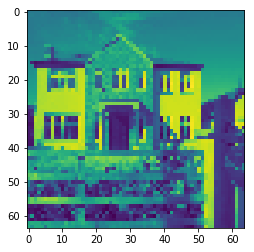

In [0]:
res = resize_house_images(df_subset_train.iloc[0:5,:])
plt.imshow(res[2])

In [0]:
import nltk
from nltk import word_tokenize, WordNetLemmatizer
from nltk.corpus import stopwords

def preprocess(sentence):
    lemmatizer = WordNetLemmatizer()
    stop_words = (stopwords.words('english'))
    stop_words.append('-')
    stop_words.append('.')
    stop_words.append(',')
    stop_words.append(';')
    stop_words.append('&')
    stop_words.append(':')
    stop_words.append(')')
    stop_words.append('(')
    stop_words.append('\'s')
    stop_words.append('\'')
    stop_words.append('\x96')    
    #stop_words.append("selection")
    word_token = word_tokenize(sentence)
    S1 = [lemmatizer.lemmatize(word.lower())  for word in word_token if not word.lower() in stop_words ]
    return S1

In [0]:
preprocess(dftrain['description_block'].iloc[0])

['selection',
 '4',
 '5',
 'bedroom',
 'family',
 'home',
 'located',
 'sea',
 'view',
 'appointment',
 'brand',
 'new',
 'show',
 'home',
 'station',
 'manor',
 'prestigious',
 'rated',
 'development',
 'situated',
 'within',
 'walking',
 'distance',
 'historic',
 'village',
 'portmarnock',
 'generously',
 'sized',
 'elegant',
 '3',
 '4',
 'amp',
 '5',
 'bedroom',
 'home',
 'ideally',
 'located',
 'minute',
 'sea',
 'front',
 'situated',
 'highly',
 'sought-after',
 'seaside',
 'village',
 'station',
 'manor',
 'exclusive',
 'development',
 'luxurious',
 'new',
 'home',
 'designed',
 'exemplary',
 'attention',
 'detail',
 'throughout',
 'offering',
 'relaxation',
 'serenity',
 'small',
 'seaside',
 'town',
 'convenience',
 'city',
 'living',
 'feature',
 'portmarnock',
 'undoubtedly',
 'one',
 'north',
 'dublin',
 'picturesque',
 'location',
 'clear',
 'view',
 'lambay',
 'island',
 'ireland',
 'eye',
 'portmarnock',
 'home',
 'famous',
 '5',
 'mile',
 'long',
 'stretch',
 'white',
 '

In [0]:
dftrain['description_block'].iloc[0]

"A SELECTION OF 4 AND 5 BEDROOM FAMILY HOMES LOCATED BY THE SEA\n\r\nON VIEW BY APPOINTMENT ONLY\n\r\nBRAND NEW SHOW HOME\n\r\nStation Manor is a prestigious 'A' Rated development situated within walking distance of the historic village of Portmarnock. These generously sized, elegant 3, 4 &amp; 5 bedroom homes are ideally located just minutes from the sea front. \n\r\nSituated in a highly sought-after seaside village, Station Manor is an exclusive development of luxurious new homes, designed with exemplary attention to detail throughout, and offering all the relaxation and serenity of a small seaside town with the convenience of city living. \n\r\nFeatures\n\r\nPortmarnock is undoubtedly one of North Dublin's most picturesque locations, with clear views of Lambay Island and Ireland's Eye. Portmarnock is home to the famous 5 mile long stretch of white sandy beaches known as the 'Velvet Strand', which stretches all the way from Malahide to Sutton. Station Manor has this beautiful amenity